### The objective of the script is to implement CNN for the classification of the image class of the dataset consisting of the 10 classes of images. The dataset standard for the Canadian Institute for Advanced Research (CIFAR-10)
                The project implementation was done with the help of the course from Dr. Ryan Ahmed
                   The dataset source: https://www.cs.toronto.edu/~kriz/cifar.html

### Importing the data and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape### images database

(50000, 32, 32, 3)

In [5]:
y_train.shape###lable of the images

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

[5]


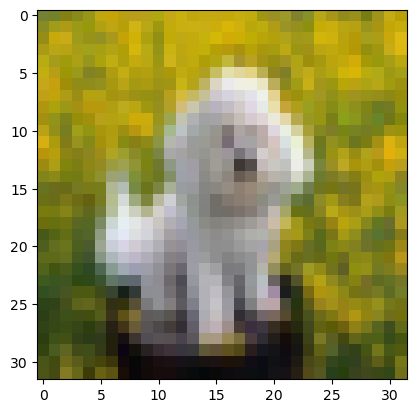

In [8]:
i = 3022
print(y_train[i])## label of the images
plt.imshow(x_train[i])## the image itself

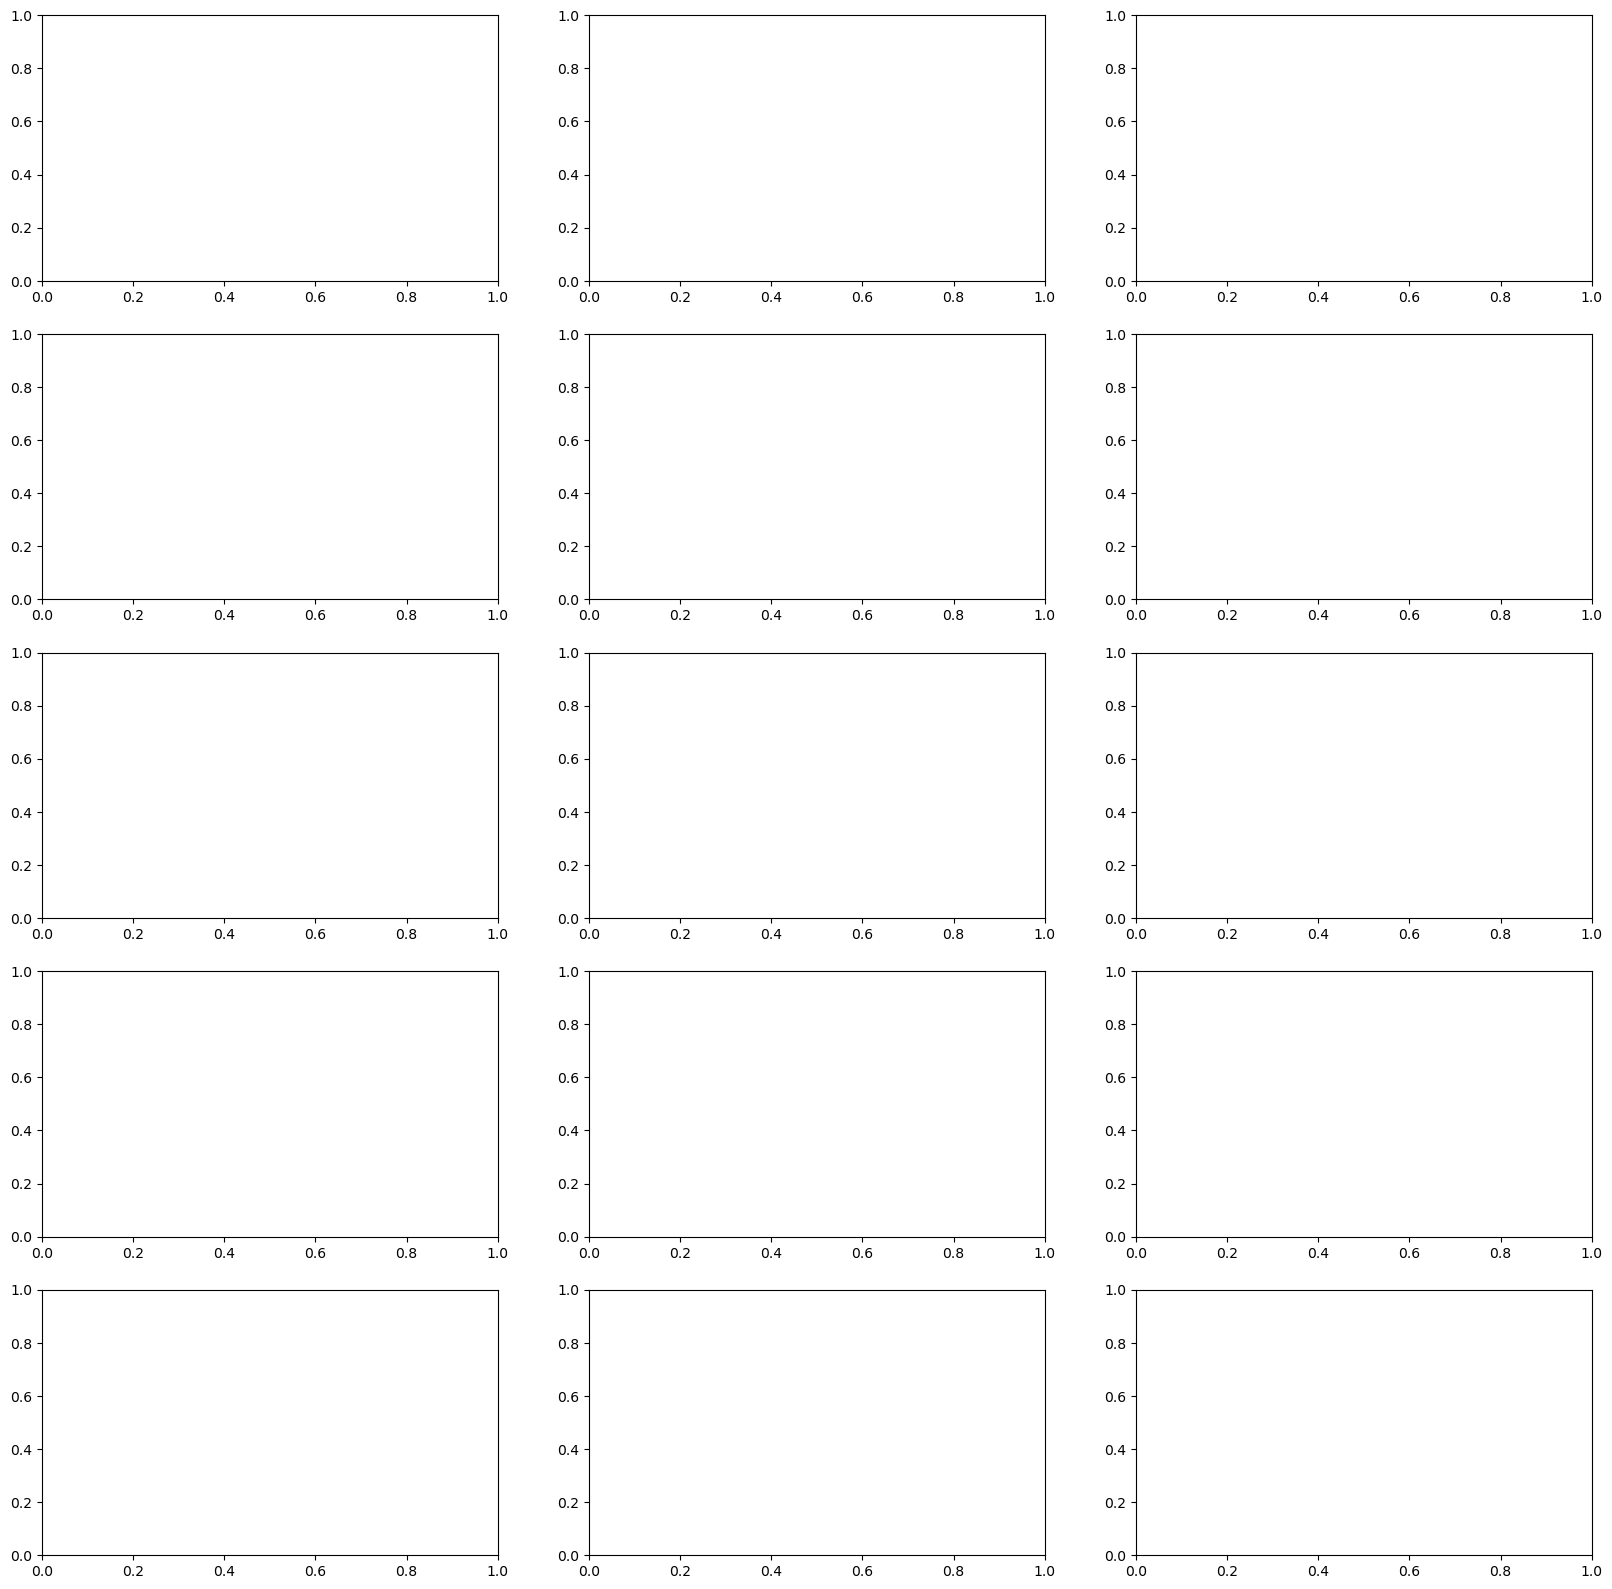

In [9]:
c_grid = 3
r_grid = 5

fig, axes = plt.subplots(r_grid,c_grid, figsize = (20,20))
axes = axes.ravel()## 3*5 

/Users/anaconda3/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


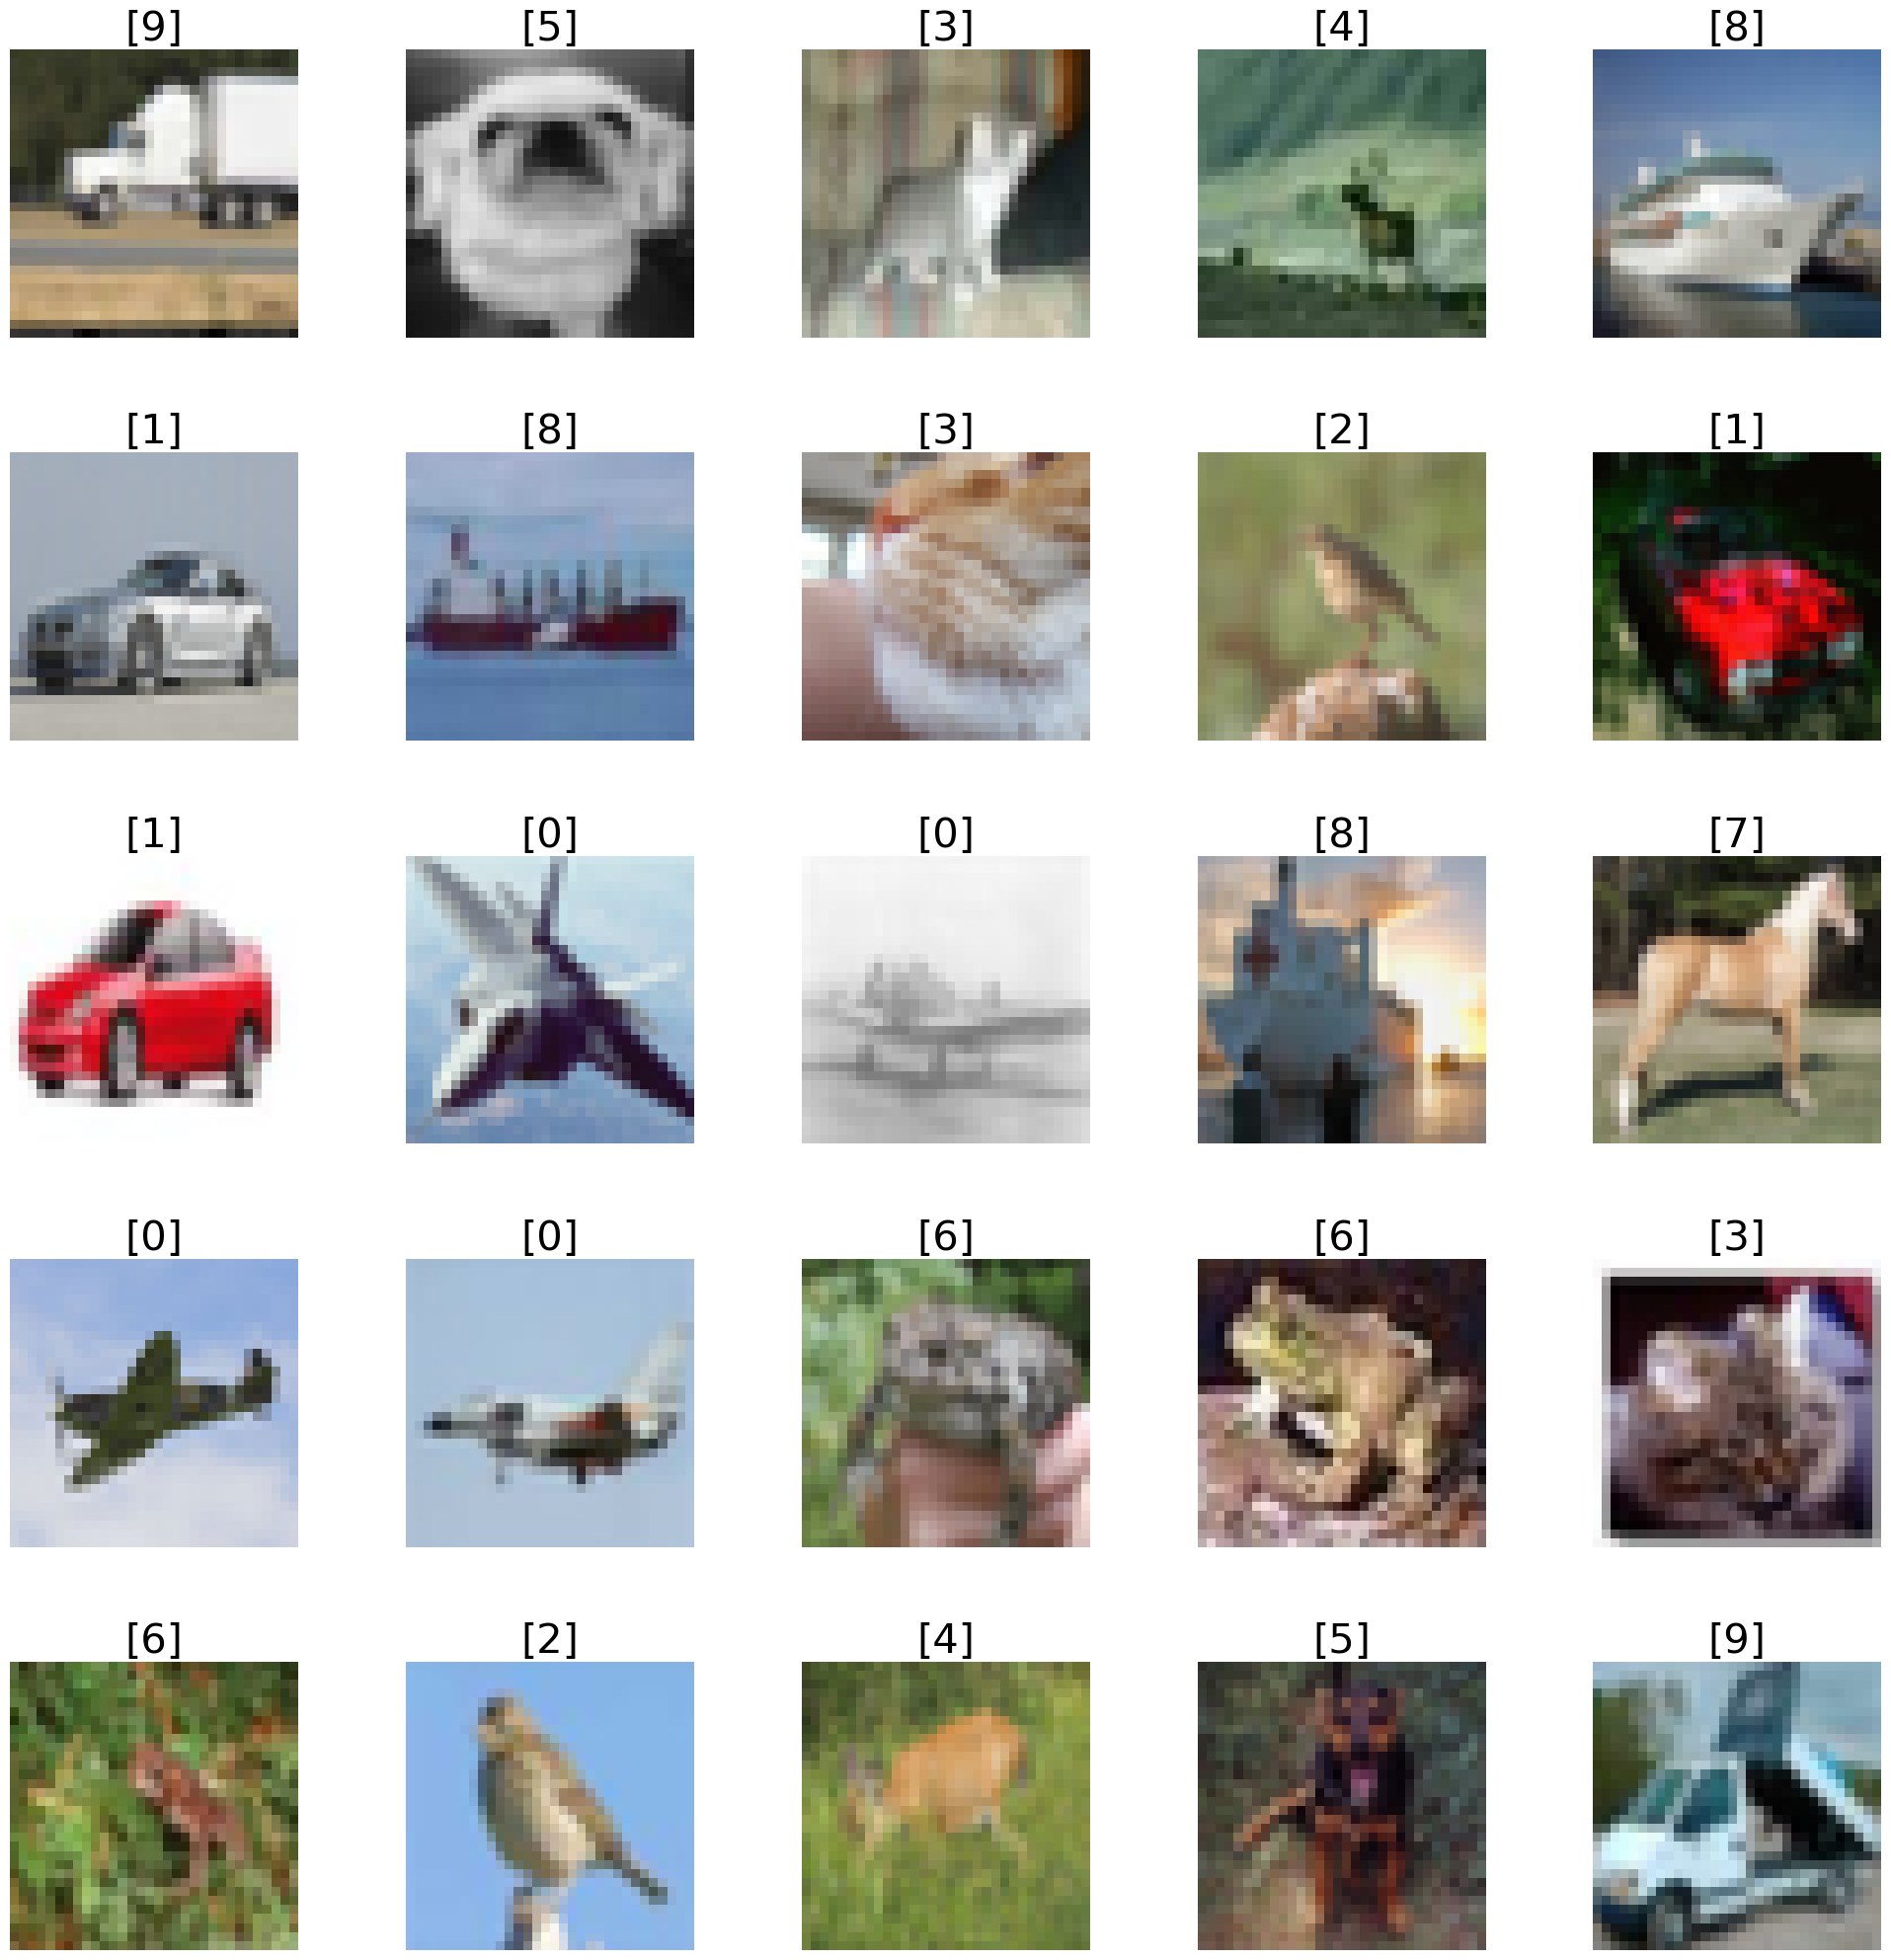

In [10]:
n_traning = len(x_train)
w_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid,w_grid, figsize = (25,25))
axes = axes.ravel()## 5*5 
for i in np.arange(0,L_grid*w_grid):## Creating an array of the list consisting of 0 to 225
    index = np.random.randint(0,n_traning)## choosing random ineger number from 0 to len x_train
    axes[i].imshow(x_train[index])##  choosing one of the i numbers from 0 and show the random image from index
    axes[i].axis('off')## for removing the axis numbers
    axes[i].set_title(y_train[index], fontsize = 30)## put the title as the lable of the data set
    
plt.subplots_adjust(hspace = 0.4)## for increasing the spase between the image
plt.savefig('CiFAR10', dpi = 300,transparent = True )

### Data preparation for CNN modeling

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')## imprtant to convert to float32, that required in data model training

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
## Convert the decimal value number value to binary value
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
## normalized the x_train to value for zero to one
x_train=x_train/255
x_test=x_test/255

In [18]:
## now the value form 0 to 1
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
y_train.shape

(50000, 10)

In [21]:
image_shape = x_train.shape[1:]

In [22]:
image_shape

(32, 32, 3)

### Model implementation

In [29]:
## Building the modeling
### Building the model as sequential from lift to the right (based on tensor)
from keras.models import Sequential 
#Conv2D: convulsion process
#MaxPooling2D: using for done sampling for composing the feature of the image
#AveragePooling2D: average the value of the image with the filter for the compressing process
#Dense: for creating the fully connecting artificial neural network
#Flatten: using for floating the image to a 1D array
#Dropout: regularization aspect
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten, Dropout

from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [30]:
## Creating convolutional network
cnn_model = Sequential()
## The first conv layer for filter 32 that has dimension 3,3 with activation function relu has the image dimensions
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = image_shape))
##second conv layer for filter 32 which has dimensions 3,3 with activation function relu no need for the image dimensions in the second layer
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
##Maxpolling layer with filter that down sample will be 2*2
cnn_model.add(MaxPooling2D(2,2))
##the regularization process by dropout 30% of the neural network
cnn_model.add(Dropout(0.3))


## This is to increase the depth of the network
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))


## for flat the 2D array to 1D array
cnn_model.add(Flatten())

## fully connected network with the number of neurons =512
cnn_model.add(Dense(units = 512, activation= 'relu'))

## creat anouther hidden layer with 
cnn_model.add(Dense(units = 512, activation= 'relu'))

## the last layer (the output layer)
## The unit based on the calcification of the output here we have 10 images that we need to classify 
## The activation function relu continues but softmax used classification processes
cnn_model.add(Dense(units = 10, activation= 'softmax'))

In [31]:
## compile the model and fitting the model with training data
##optimazer we used root mean error
cnn_model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001),metrics = ['accuracy'])

In [33]:
model_fitting_result = cnn_model.fit(x_train,y_train, batch_size= 32, epochs=2, shuffle=True)

Epoch 1/2
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1275 - accuracy: 0.6038
Epoch 2/2
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9469 - accuracy: 0.6726


### Evalulation and predaction stage

In [34]:
Evaluation = cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8688 - accuracy: 0.7029


In [35]:
print(Evaluation)

[0.868825376033783, 0.7028999924659729]


In [36]:
print(Evaluation[1])

0.7028999924659729


In [45]:
predicted = np.argmax(cnn_model.predict(x_test),axis = 1)

313/313 [==============================] - 3s 11ms/step


In [46]:
predicted

array([3, 8, 8, ..., 5, 1, 7])

In [47]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
y_test = y_test.argmax(1)

In [50]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

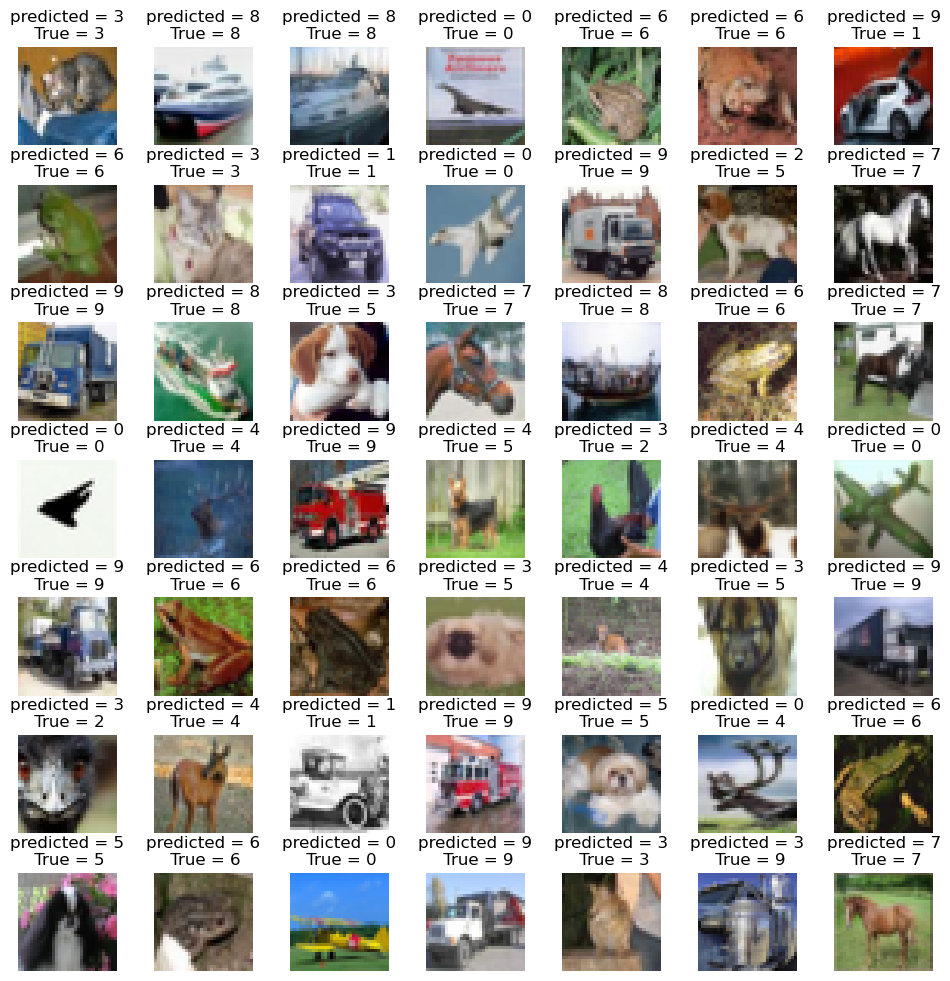

In [53]:
L = 7
W = 7

fig,axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() ##7*7

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('predicted = {}\n True = {}'. format(predicted[i], y_test[i]))
    axes[i].axis('off')## for removing the axis numbers
plt.subplots_adjust(hspace = 0.4)## for increasing the spase between the image

<Axes: >

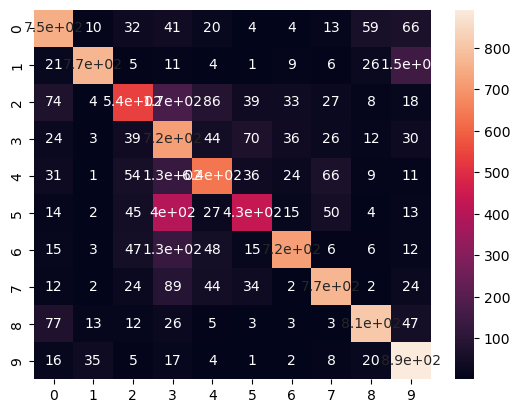

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm
sns.heatmap(cm, annot=True)


### The end